In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\RKRIS\Downloads\Cars\cars-+K+men.csv')

In [3]:
print(df.shape)
print(df.columns)
df.head(5)

(398, 9)
Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
print(df['hp'].unique())
{columns:len(df[columns].unique()) for columns in df.columns}

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


{'mpg': 129,
 'cyl': 5,
 'disp': 82,
 'hp': 94,
 'wt': 351,
 'acc': 95,
 'yr': 13,
 'origin': 3,
 'car_name': 305}

We can see '?' as an string value in our HP feature, replace it with NaN values than treating the NaN values.

In [6]:
df[df['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
df['hp']=df['hp'].replace('?', np.nan)
df['hp'] =df['hp'].astype('float')

In [8]:
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
wt,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


Using KNN imputer to impute NAN values, different cars have differnt HP and aslo we have highly +ve corelated features.

In [9]:
np.random.seed(seed=0)
disp = np.random.choice(a=df.index, replace=False, size=8)
df.loc[disp , 'disp'] =np.nan

In [10]:
np.random.seed(seed=0)
wt = np.random.choice(a=df.index, replace=False, size=8)
df.loc[wt, 'wt'] =np.nan

In [11]:
from sklearn.impute import KNNImputer

In [12]:
df.drop('car_name', axis=1, inplace=True)

In [13]:
KI = KNNImputer()

In [14]:
KI.fit(df)

KNNImputer()

In [15]:
df=pd.DataFrame(KI.transform(df))

In [16]:
df.columns= ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin',]

In [25]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [17]:
print(df.isna().sum().sum())

0


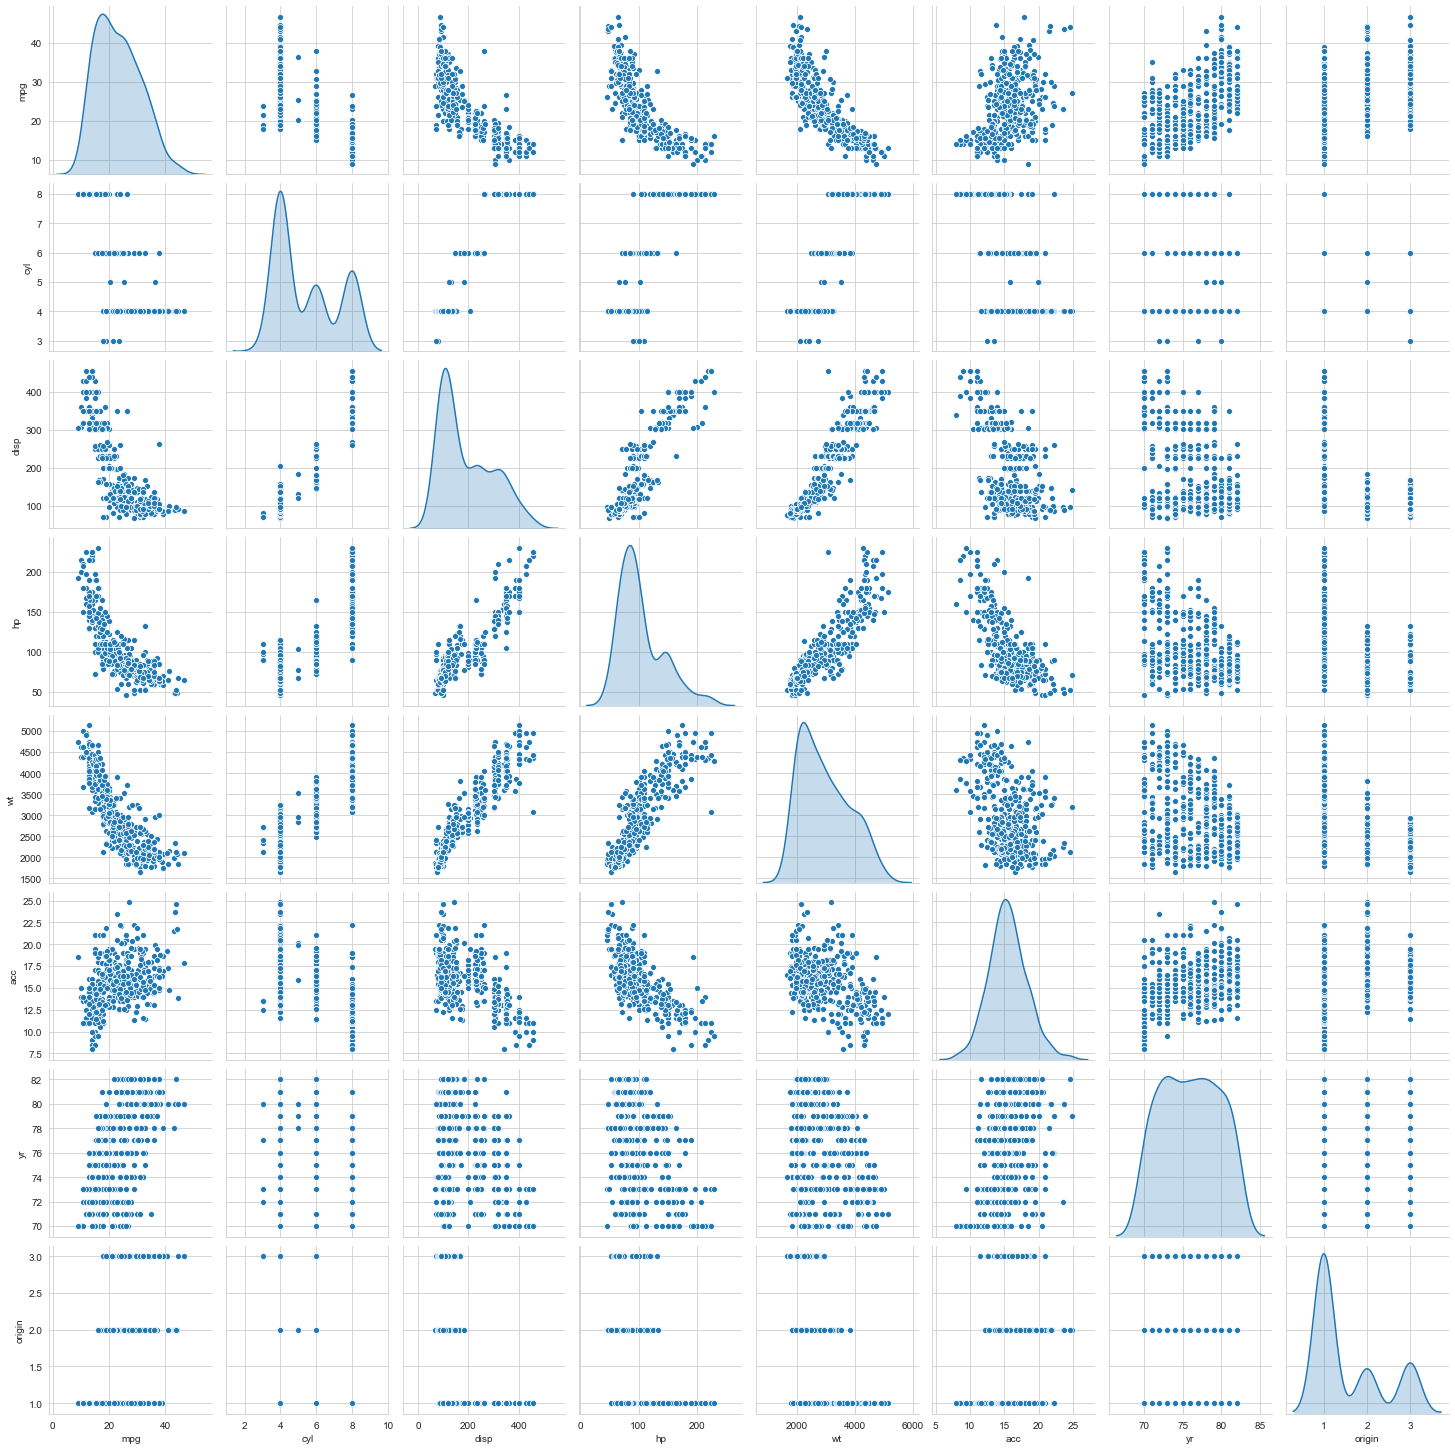

In [18]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df,diag_kind='kde');

1. In 'cyl' column , we can see that there are three peaks in the density curve , that means it has 3 modes and probably centering around 3 clusters
2. Even for disp column, we can see two little spikes in the density curver, probably even this might be centering around 3 clusters
3. One little spike in hp column as well , most probably even this might be centering around 3 clusters
4. Except acc the rest of the columns has one little spike apart from the mode value , most probably the columns might be centering around 2 clusters
5. ACC columns looks like a clean gaussian curve with only one spike
6. The columns disp,hp,wt,mpg are little positively skewed , as there is a little tail on the right side . It might indicate the presence of outliers.

In [26]:
from scipy import stats
sc_df = pd.DataFrame(stats.zscore(df),columns=['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin',])
sc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,2.761610e-16,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335
cyl,398.0,-5.171742e-16,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
disp,398.0,-3.470144e-16,1.001259,-1.206459,-0.876477,-0.409122,0.657196,2.511244
hp,398.0,-3.386459e-16,1.001259,-1.518807,-0.754532,-0.316871,0.545388,3.288939
wt,398.0,6.876130e-17,1.001259,-1.563785,-0.886800,-0.196789,0.755787,2.569766
acc,398.0,8.982206e-17,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
yr,398.0,-8.837152e-16,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983
origin,398.0,-4.781212e-16,1.001259,-0.715145,-0.715145,-0.715145,0.533222,1.781589


In [56]:
from sklearn.cluster import KMeans
from sklearn import metrics


k_range = range( 2, 11)   
squared_errors = []
sil_scores = []
for n_clusters in k_range:
    clusters = KMeans(n_clusters, init='k-means++')
    clusters.fit(sc_df)
    labels = clusters.labels_                     
    centroids = clusters.cluster_centers_         
    squared_errors.append( clusters.inertia_ )
    sil_scores.append(metrics.silhouette_score(sc_df, labels, metric='euclidean')) 
  
#combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "n_clusters": k_range, "squared_errors": squared_errors, "Avg Sil Score": sil_scores } )
clusters_df

,n_clusters,squared_errors,Avg Sil Score
0,2,1676.181530,0.420376
1,3,1189.922555,0.356152
2,4,1016.234636,0.333149
3,5,861.769068,0.338607
4,6,779.887824,0.342400
5,7,727.967286,0.269234
6,8,659.934583,0.282924
7,9,620.356064,0.269665
8,10,584.904726,0.269784


1. from the above silhoutte score table we can see none of the Sil_score reaching towards 1 which indicates farthest & tighest cluster

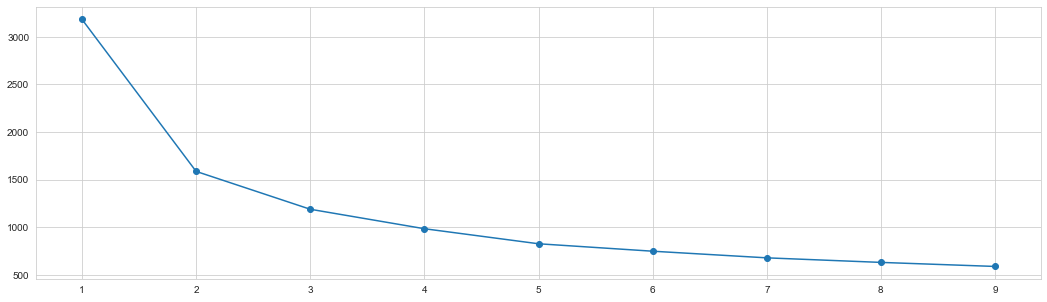

In [28]:
plt.figure(figsize=(18,5))
plt.plot( clusters_df.n_clusters, clusters_df.squared_errors, marker = "o" )

1. we select that value of k where the gradiant reduces drastically
2. Here in the elbow curve we can obsever that gradiant from k= 3 to k= 4 is changing at higher rate so in this k= 3

In [29]:
kmeans = KMeans(n_clusters=3)

kmeans = kmeans.fit(sc_df)

labels = kmeans.predict(sc_df)

centroids = kmeans.cluster_centers_

print("Centroid values")
print(centroids)

Centroid values
[[ 0.89844152 -0.81610375 -0.86510101 -0.70646937 -0.86695402  0.27002569
   0.31010992  0.95968268]
 [-0.23301503 -0.12590632 -0.05460134 -0.24588347  0.01912737  0.43720956
   0.08226919 -0.60579879]
 [-1.12726026  1.4864187   1.46761647  1.47427603  1.36959147 -1.03371846
  -0.61198576 -0.71514478]]


In [30]:
prediction=kmeans.predict(sc_df)
sc_df = pd.DataFrame(sc_df)
sc_df["cluster"] = prediction

In [31]:
sc_df.groupby("cluster").count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
cluster,,,,,,,,
0,161,161,161,161,161,161,161,161
1,137,137,137,137,137,137,137,137
2,100,100,100,100,100,100,100,100


In [35]:
sc_df["cluster"].value_counts()

0    161
1    137
2    100
Name: cluster, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFE67F87C8>,
      dtype=object)

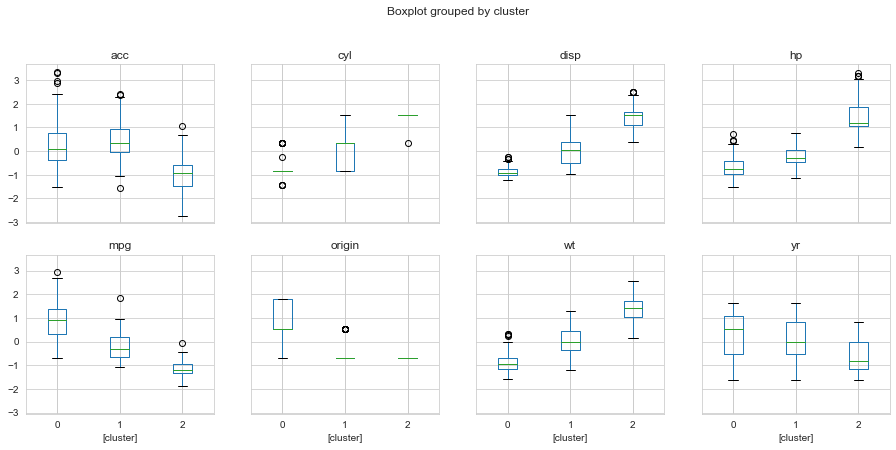

In [37]:
sc_df.boxplot(by = 'cluster',  layout=(3,4), figsize=(15, 10))

There are multiple outliers at group level as per above box plot


C:\Users\RKRIS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFE3FA1D88>,
      dtype=object)

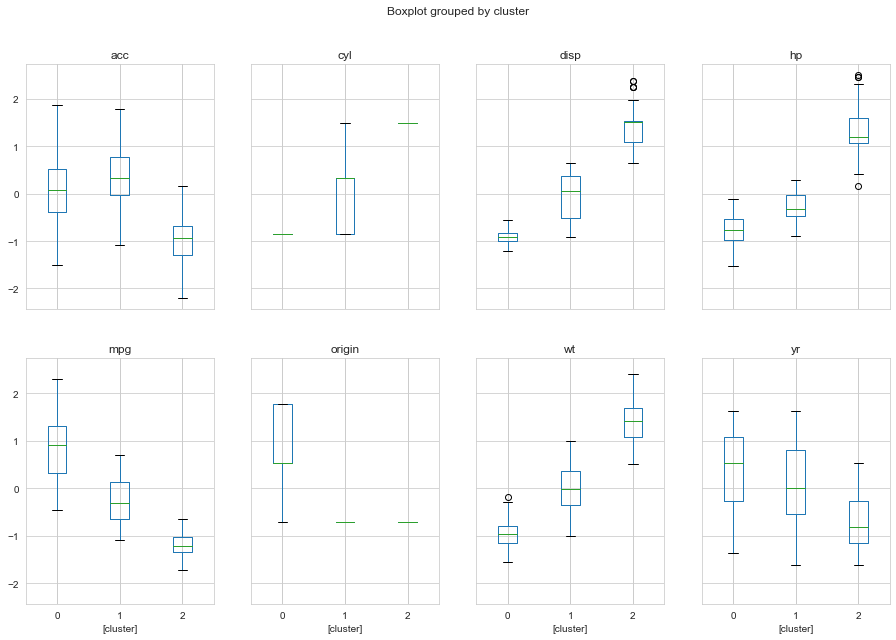

In [39]:
import warnings
data = sc_df   
       
def replace(group):
    median, std = group.median(), group.std()   
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('cluster').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(sc_df['cluster']))

concat_data.boxplot(by = 'cluster', layout=(2,4), figsize=(15, 10))


1. Get the median and the standard deviation of every group 
2. Subtract median from every member of each group. Take absolute values > 2std
3. Replacing group outliers with group median   

In [42]:
df0 = sc_df.loc[(sc_df["cluster"] == 0)]
df1 = sc_df.loc[(sc_df["cluster"] == 1)]
df2 = sc_df.loc[(sc_df["cluster"] == 2)]

print("df0 data frame dimension:",df0.shape)
print("df1 data frame dimension:",df1.shape)
print("df2 data frame dimension:",df2.shape)

df0 data frame dimension: (161, 9)
df1 data frame dimension: (137, 9)
df2 data frame dimension: (100, 9)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

For cluster 0

In [64]:
X0 = df0.drop("mpg",axis=1)
Y0 = df0["mpg"]
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3, random_state=1)
regression_model0 = LinearRegression()
regression_model0.fit(X0_train, Y0_train)
Y0_predicted = regression_model0.predict(X0_test)
rmse = mean_squared_error(Y0_test, Y0_predicted)
r2 = r2_score(Y0_test, Y0_predicted)

print('Slope:' ,regression_model0.coef_)
print('Intercept:', regression_model0.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

coefficients of model for cluster 0: [ 0.36266353 -0.066121   -0.46789317 -0.57909113  0.04141476  0.3990298
 -0.02529146  0.        ]
Slope: [ 0.36266353 -0.066121   -0.46789317 -0.57909113  0.04141476  0.3990298
 -0.02529146  0.        ]
Intercept: 0.14741325861270915
Root mean squared error:  0.21819087430405681
R2 score:  0.6229331114757168


For cluster 1

In [65]:
#For cluster 1
X1 = df1.drop("mpg",axis=1)
Y1 = df1["mpg"]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=1)
regression_model1 = LinearRegression()
regression_model1.fit(X1_train, Y1_train)
Y1_predicted = regression_model1.predict(X1_test)
rmse = mean_squared_error(Y1_test, Y1_predicted)
r2 = r2_score(Y1_test, Y1_predicted)

print('Slope:' ,regression_model1.coef_)
print('Intercept:', regression_model1.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

coefficients of model for cluster 0: [-0.00193672 -0.09607352 -0.19660673 -0.4922327  -0.07532777  0.30032368
 -0.11668811  0.        ]
Slope: [-0.00193672 -0.09607352 -0.19660673 -0.4922327  -0.07532777  0.30032368
 -0.11668811  0.        ]
Intercept: -0.33557389411583116
Root mean squared error:  0.0767253342654241
R2 score:  0.6451232607481823


For cluster 2

In [67]:
X2 = df2.drop("mpg",axis=1)
Y2 = df2["mpg"]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=1)
regression_model2 = LinearRegression()
regression_model2.fit(X2_train, Y2_train)
Y2_predicted = regression_model2.predict(X2_test)
rmse = mean_squared_error(Y2_test, Y2_predicted)
r2 = r2_score(Y2_test, Y2_predicted)

print('Slope:' ,regression_model2.coef_)
print('Intercept:', regression_model2.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

coefficients of model for cluster 0: [-1.36038855e-01  1.34840832e-01 -1.33138192e-01 -2.29486466e-01
 -5.69920543e-02  1.83120769e-01 -2.06329494e-30  0.00000000e+00]
Slope: [-1.36038855e-01  1.34840832e-01 -1.33138192e-01 -2.29486466e-01
 -5.69920543e-02  1.83120769e-01 -2.06329494e-30  0.00000000e+00]
Intercept: -0.5522942911032105
Root mean squared error:  0.025592936188373435
R2 score:  0.6858733290142429
